## Доверительные интервалы

На основе выборки мы всегда можем измерить следующие показатели:
* **выборочное среднее** (центральная мера распределения);
* **выборочное стандартное отклонение** (мера разброса);
* **выборочную пропорцию** (доля объектов из выборки, выбранных по условию, например доля пользователей, совершивших покупки).

На самом деле нас интересуют параметры генеральной совокупности: 
* **истинное среднее** — математическое ожидание ($\mu$);
* **истинное стандартное отклонение** ($\sigma$);
* **истинная пропорция** ($p$).

Cпособы оценки параметров генеральной совокупности:
* Точечные оценки.
* Интервальные оценки

**Доверительный интервал** — интервал, который с заданной надёжностью покрывает значение неизвестного параметра

Доверительные интервалы бывают двусторонними, левосторонними и правосторонними

Параметр = Выборочная оценка ± Предел погрешности

Выборочной оценкой может быть среднее, стандартное отклонение, пропорция, медиана и т.д.

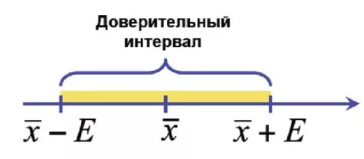

### Демонстрация работы центральной предельной теоремы

Теорема утверждает, что с увеличением размера выборки распределение среднего значения по нескольким выборкам будет приближаться к распределению Гаусса

Пример:
Посмотрим на распределение среднего в нескольких выборках бросков кубика. Мы знаем, что истинное среднее = 3.5

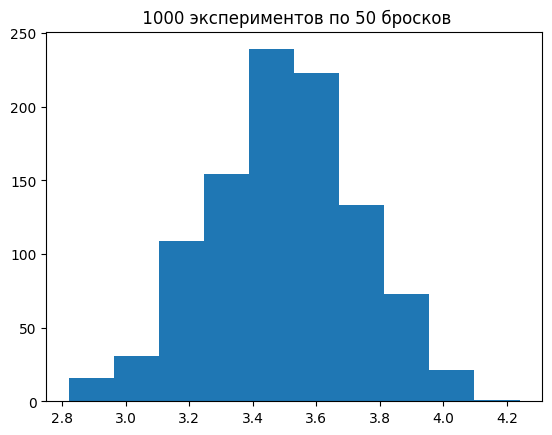

In [7]:
# demonstration of the central limit theorem
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
# seed the random number generator
seed(1)
# calculate the mean of 50 dice rolls 1000 times
means = [mean(randint(1, 7, 50)) for _ in range(1000)]
# plot the distribution of sample means
pyplot.hist(means)
pyplot.title(' 1000 экспериментов по 50 бросков')
pyplot.show()

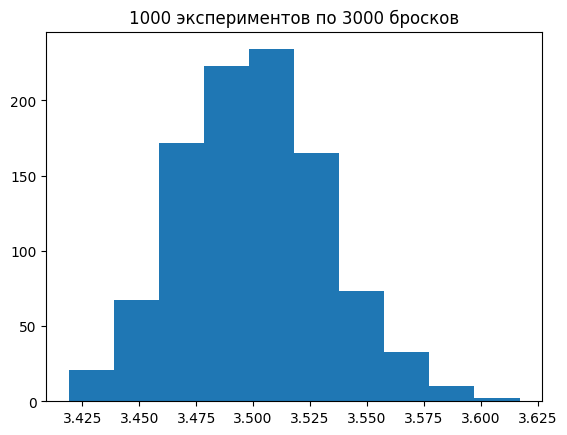

In [8]:
# demonstration of the central limit theorem
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
# seed the random number generator
seed(1)
# calculate the mean of 50 dice rolls 1000 times
means = [mean(randint(1, 7, 3000)) for _ in range(1000)]
# plot the distribution of sample means
pyplot.hist(means)
pyplot.title('1000 экспериментов по 3000 бросков')
pyplot.show()

### Доверительный интервал для истинного среднего при известном стандартном отклонении

$\mu = X_{mean} \plusmn z_{крит} * {\cfrac \sigma {\sqrt{n}}}$

$z_{крит}$ — это случайная величина, имеющая нормальное распределение с математическим ожиданием (центром) $\mu = 0$ и стандартным отклонением (разбросом) $\sigma = 1$.

Определяется уровнем надёжности (уровнем доверия) $\gamma = 1 - \alpha$, где $\alpha$ — уровень значимости или вероятность ошибки I рода. Тогда уровень надёжности — вероятность НЕ допустить ошибку I рода.

Под уровнем надёжности понимается вероятность того, что истинное значение параметра окажется в построенном интервале. А под уровнем значимости — вероятность того, что построенный доверительный интервал «промахнётся» и не захватит истинное значение параметра.

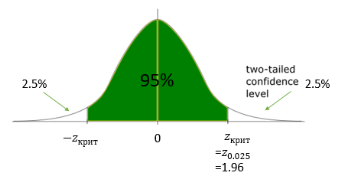

Т.o, $z_{крит}$ — это значение, которое отсекает критическую область нормального распределения

$z_{крит} = z_{{\cfrac {\gamma-1} 2}} = z_{{\cfrac {\alpha} 2}}$

#### Пример

Была опрошена случайная выборка из 36 жителей региона об их затратах на продукты питания за последний месяц. Выборочное среднее оказалось равным 16 100 рублей.
Допустим, откуда-то известно, что истинное стандартное отклонение расходов равно 12 000 рублей.
Нам нужно построить доверительный интервал для истинных средних расходов жителя данного региона на продукты питания в месяц. Интервал должен определять истинное значение с надежностью в 95 %.

In [9]:
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [10]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z критическое

In [11]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (12180, 20020)


Мы на 95 % уверены, что истинные расходы жителей на продукты питания лежат в интервале от 12 180 рублей до 20 020 рублей. 

### Доверительный интервал для истинного среднего при неизвестном стандартном отклонении

В реальной жизни нам приходится заменять значение истинного стандартного отклонения значением выборочного стандартного отклонения, которое мы можем посчитать на основании выборки.

Когда мы заменяем константу на случайную величину, точность всей конструкции явно становится меньше. Вероятно, итоговая величина будет похожа на нормальное распределение, но будет обладать бОльшим разбросом (разброс будет различным в зависимости от степеней свободы $k$).

Такая случайная величина хорошо описывается распределением Стьюдента, или Т-распределением. 

$k = n - 1$

Чем больше $k$, тем меньше разброс распределения и тем ближе оно к нормальному

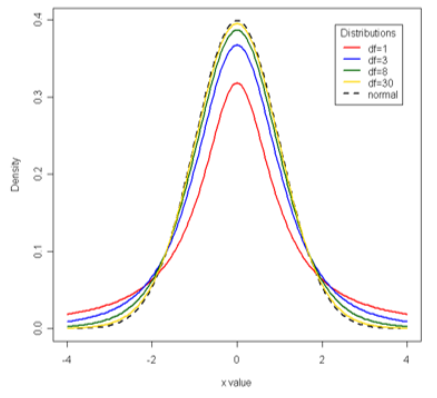

$\mu = X_{mean} \plusmn t_{крит} * {\cfrac {X_{std}} {\sqrt{n}}}$

$t_{крит} (k) = t_{{\cfrac {\gamma-1} 2}} (k) = t_{{\cfrac {\alpha} 2}} (k)$

Значение t-критического при том же уровне надёжности чуть выше, чем значение z-критического. Благодаря этому доверительный интервал при неизвестном стандартном отклонении гарантировано будет шире, чем при известном, если $\sigma = X_{std}$

### Пример

Управляющий супермаркета хочет оценить, сколько денег покупатели тратят за один поход в супермаркет в среднем. На основании ранее собранных данных известно, что расходы одного покупателя распределены приблизительно нормально. Управляющий взял случайную выборку из 15 покупателей и выяснил, что их средние расходы равны 2 000 рублей, а выборочное стандартное отклонение равно 400 рублей.

In [18]:
n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [19]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [20]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (1778, 2222)


Мы на 95 % уверены, что истинные траты покупателей в нашем магазине лежат в интервале от 1 778 до 2 222 рублей

Обе формулы работают только при соблюдении двух условий:
* Выборка должна быть случайной.
* Выборка должна быть достаточно велика. Но есть исключение: если выборка маленькая, но сама величина распределена нормально, то выборочное среднее тоже будет распределено нормально. В таком случае мы можем пользоваться формулой доверительного интервала.

### Доверительный интервал для пропорции

Нам бы хотелось знать истинную конверсию (а не ту, которая подсчитана по выборке) в контрольной и тестовой группе, а также оценить истинную разницу между конверсиями. 

Истинное среднее (математическое ожидание) такой случайной величины $\mu = p$, а истинное стандартное отклонение $\sigma = \sqrt{p(1 - p)}$. 

$X_p$ - выборочная пропорция (в нашем случае выборочная конверсия)

$p = \mu = X_p \plusmn z_{крит} * {\sqrt {\cfrac {X_p(1 - X_p)} n}}$

In [25]:
import pandas as pd

ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [26]:
#фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
#фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

In [27]:
def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [28]:
conf_interval_a = proportions_conf_interval(
n=a_data['user_id'], # размер выборки
x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
n=b_data['user_id'].count(), # размер выборки
x_p=b_data['converted'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))

Доверительный интервал для конверсии группы А: (11.86, 12.19)
Доверительный интервал для конверсии группы B: (11.7, 12.03)


Интервалы пересекаются. Это значит, что существует вероятность, что истинное значение конверсии в обеих группах может совпасть.

То есть мы не можем однозначно сказать, есть ли разница в конверсиях. Можно даже рассчитать эту вероятность, но лучше построить доверительный интервал разницы пропорций (конверсий).

$\Delta p = \Delta X_p \plusmn z_{крит} * {\sqrt {{\cfrac {X_{p_a}(1 - X_{p_a})} {n_a}} + {\cfrac {X_{p_b}(1 - X_{p_b})} {n_b}}}}$, где
* $\Delta p = p_b - p_a$ — истинная разница конверсий групп B и A;
* $\Delta X_p = X_{p_b} - X_{p_a}$ — выборочная разница конверсий групп B и A.

Интерпретация:
* **$\Delta p$ положительная** (обе границы > 0) - вариант B более эффективен по метрике конверсии, чем вариант А с заданной надёжностью;

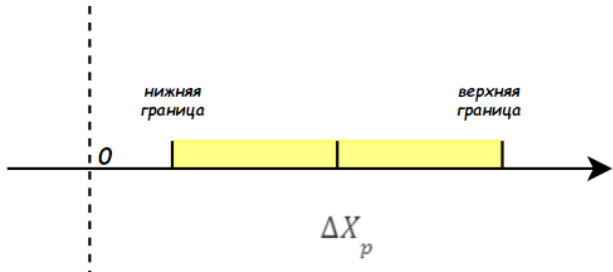
* **$\Delta p$ отрицательная** (обе границы < 0) - вариант B менее эффективен по метрике конверсии, чем вариант А с заданной надёжностью;

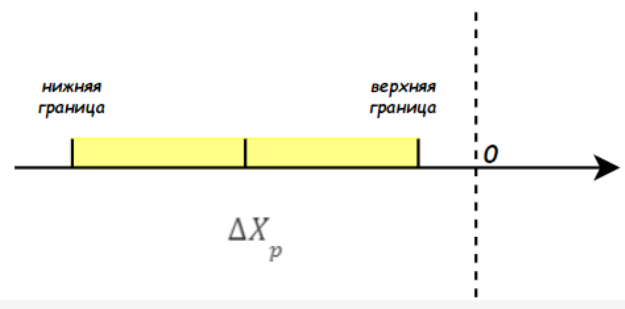
* **$\Delta p$ охватывает точку 0** -  варианты А и B равнозначны по метрике конверсии

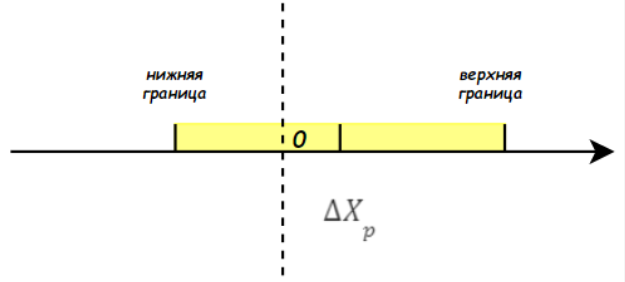

In [29]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [30]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

Доверительный интервал для разности конверсий: (-0.39, 0.08)


Построенный доверительный интервал с 95 %-ой надёжностью говорит нам, что разница в конверсии между вариантом B и вариантом А лежит в интервале от -0.39 % до 0.08 %. 

Отсюда можно сделать вывод, что статистической разницы в конверсии между вариантами А и B не существует, то есть они являются равнозначными по данной метрике.